In [5]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# import csv and rename as a dataframe
hb = pd.read_csv(r'C:\Users\Owner\OneDrive\Springboard Work Submittals\hotel_bookings.csv')
hb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [199]:
# explore dependent variable and create df for plotting purporses
canceled=hb['is_canceled'].value_counts(sort=True)
canceled

0    75166
1    44224
Name: is_canceled, dtype: int64

In [8]:
# determine proportion of data that is canceled
print('percentage of total that is canceled(1)')
hb['is_canceled'].value_counts(normalize=True)

percentage of total that is canceled(1)


0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

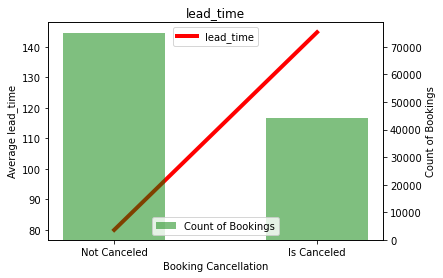

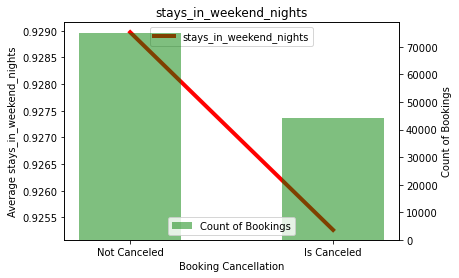

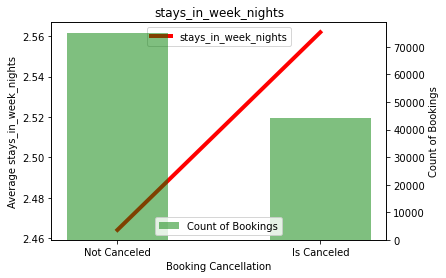

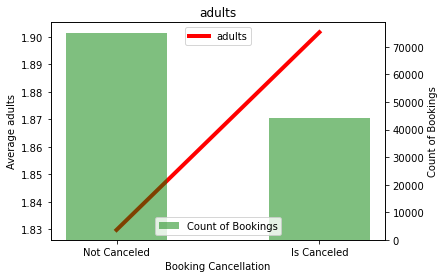

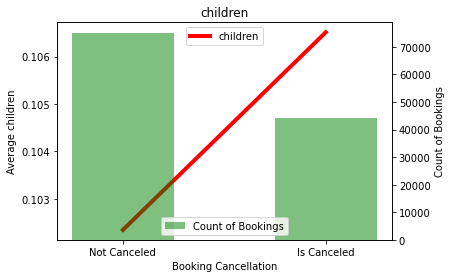

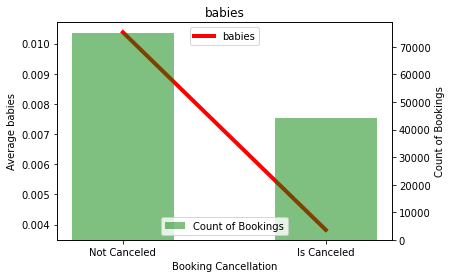

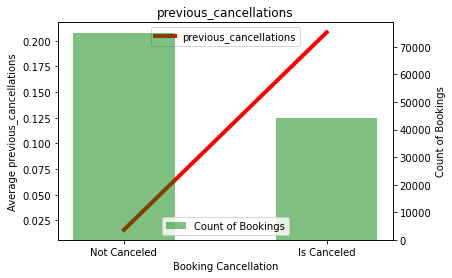

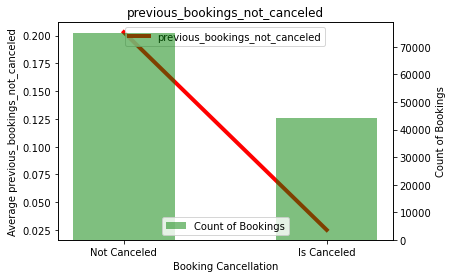

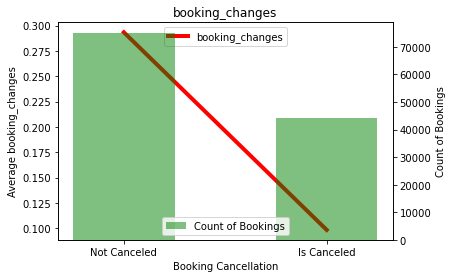

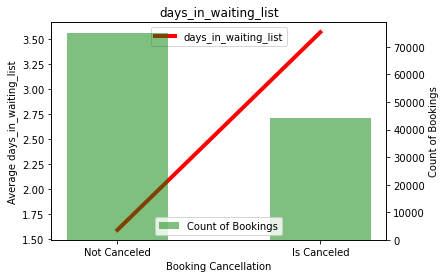

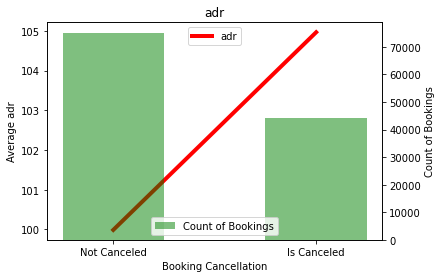

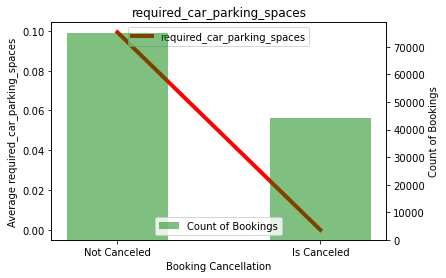

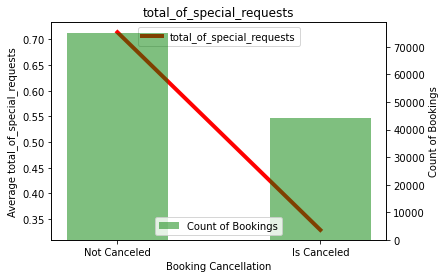

In [215]:
# determine continuous independent variables and averages
cont_var = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
avg_cont_var = hb.groupby('is_canceled')[cont_var].mean()

# plot combo chart for avg of continuous variables against bookings-not canceled & is canceled using a loop
for item in cont_var :
    fig,ax1 = plt.subplots()
    ax1=avg_cont_var[item].plot(color='red',linewidth=4)
    ax1.set_ylabel('Average ' + item)
    ax1.set_xlabel('Booking Cancellation')
    ax1.legend([item],loc='upper center')
    ax1.set_xticks([0,1])
    ax1.set_xticklabels(['Not Canceled','Is Canceled'])
    ax2 = ax1.twinx()
    ax2.bar(canceled.index,canceled, color = 'green',width=0.5,alpha=0.5)
    ax2.set_ylabel('Count of Bookings')
    ax2.legend(['Count of Bookings'], loc='lower center')
    ax1.grid(False)
    plt.title(item)
    plt.show()

In [218]:
cont_var = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
avg_cont_var = hb.groupby('is_canceled')[cont_var].mean()
avg_cont_var

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,
0,79.984687,0.928971,2.464053,1.829737,0.102347,0.010377,0.015792,0.202977,0.293364,1.589868,99.987693,0.0993,0.714060
1,144.848815,0.925267,2.561912,1.901728,0.106513,0.003821,0.208348,0.025122,0.098340,3.564083,104.964333,0.0000,0.328826


In [229]:
# import necessary package for ztest of continuous variables & seperate dependent variable into two df's 
from statsmodels.stats.weightstats import ztest as ztest
canceled = hb[hb['is_canceled'] == 1]
booked = hb[hb['is_canceled'] == 0]

# conduct ztest for each continuous variable (with loop) against the dependent variable to determine significance
for item in cont_var:
    count = np.array([sum(canceled[item]), sum(booked[item])])
    nobs = np.array([len(canceled[item]),len(booked[item])])
    print(item)
    print(ztest(count,nobs,value=0))
print('According to z-tests that were performed on the continuous variables with the dependent variable is_canceled, these variables are considered significant with p-values <0.05:\n lead_time\n 5.92 e-213\n stays_in_week_nights\n 0.022\n babies\n 0.0001\n previous_cancellations\n 0.0006\n previous_bookings_not_canceled\n 0.0024\n booking_changes\n 0.0091\n days_in_waiting_list\n 0.0013\n adr\n 2.8041 e-05\n required_car_parking_spaces\n 0.0004')

lead_time
(31.145055743375384, 5.917422991957027e-213)
stays_in_weekend_nights
(-0.20413381206519782, 0.8382489324018505)
stays_in_week_nights
(2.2879446246752417, 0.022140746122689757)
adults
(1.6559525737489909, 0.09773142355237224)
children
(nan, nan)
babies
(-3.827093108207422, 0.00012966547742315334)
previous_cancellations
(-3.4095039545226973, 0.0006508113436196442)
previous_bookings_not_canceled
(-3.02807304825622, 0.00246118586120972)
booking_changes
(-2.608573535598536, 0.009092047431495423)
days_in_waiting_list
(3.2129479343049105, 0.001313801038249854)
adr
(4.188813975117952, 2.8041614236748247e-05)
required_car_parking_spaces
(-3.51642068473597, 0.00043740732545563034)
total_of_special_requests
(-1.025832826654643, 0.3049703899504065)
According to z-tests that were performed on the continuous variables with the dependent variable is_canceled, these variables are considered significant with p-values <0.05:
 lead_time
 5.92 e-213
 stays_in_week_nights
 0.022
 babies
 0.0001
 

In [221]:
# explore categorical variable data with dependent variable using pivot tables

# creat list of categorical variables to use for loop 
cat_var= ['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','is_repeated_guest','arrival_date_day_of_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status','reservation_status_date']

# create pivot table from each variable of the list using loop
for i in cat_var:
    cat_can = hb.pivot_table(index=i,columns='is_canceled',aggfunc='size',fill_value=0)
    totals= cat_can.append(cat_can.sum().rename('Total')).assign(Total = lambda d: d.sum(1))
    totals['% of canceled']= totals[1]/totals['Total']*100
    cat_totals=totals['Total'].reset_index()
    cat_perc=totals['% of canceled'].reset_index()
    print(totals)

    
    
    


is_canceled       0      1   Total  % of canceled
hotel                                            
City Hotel    46228  33102   79330      41.726963
Resort Hotel  28938  11122   40060      27.763355
Total         75166  44224  119390      37.041628
is_canceled            0      1   Total  % of canceled
arrival_date_year                                     
2015               13854   8142   21996      37.015821
2016               36370  20337   56707      35.863297
2017               24942  15745   40687      38.697864
Total              75166  44224  119390      37.041628
is_canceled             0      1   Total  % of canceled
arrival_date_month                                     
April                6565   4524   11089      40.797186
August               8638   5239   13877      37.753117
December             4409   2371    6780      34.970501
February             5372   2696    8068      33.415964
January              4122   1807    5929      30.477315
July                 7919   

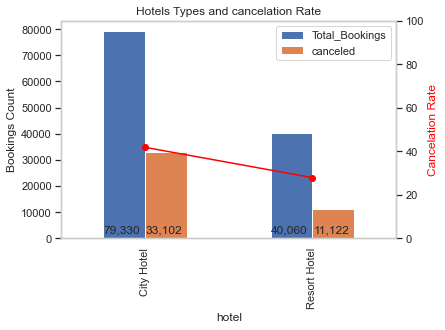

In [859]:
# determine count of total and canceled bookings & determine rate of cancellation for hotels variable

hotels = hb.groupby('hotel').agg(Total_Bookings =('is_canceled','count'),canceled =('is_canceled','sum'))
hotels['canceled rate'] = (hotels['canceled']/hotels['Total_Bookings'])*100

# plot hotels: total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()


ax = hotels.plot(kind='bar',y=['Total_Bookings','canceled'], ax=ax0)
ax.set_title("Hotels Types and cancelation Rate")
ax.set_ylabel("Bookings Count")
ax.grid(False)

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() * 1.005,2000))
            
ax = hotels.plot(kind='line',y='canceled rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
plt.ylim(0,100)
ax.set_ylabel("Cancelation Rate", color='red')
ax.grid(False)

plt.show()
plt.close()

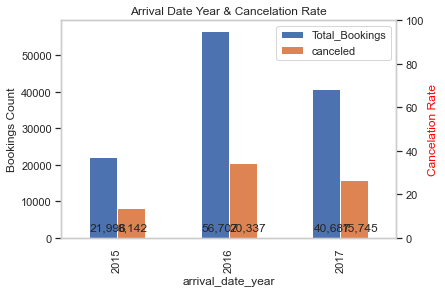

In [868]:
# determine Total bookings, canceled bookings, and cancel rate for arrival_date_year
arrival_date_year = hb.groupby('arrival_date_year').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
arrival_date_year['canceled rate']= (arrival_date_year['canceled']/arrival_date_year['Total_Bookings'])*100

# plot combo chart of total bookings, canceled bookings, and cancel rate
fig0, ax0 = plt.subplots()
ax1=ax0.twinx()

ax= arrival_date_year.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Arrival Date Year & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))
    
ax = arrival_date_year.plot(kind='line', y='canceled rate', secondary_y=True, marker='o',color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()


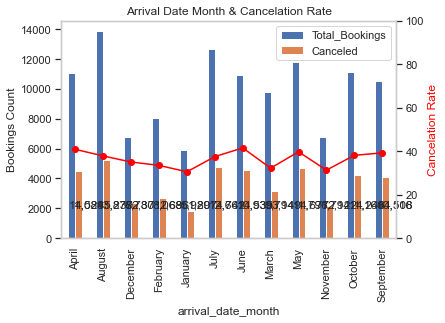

In [869]:
# determine total bookings, canceled bookings, & cancellation rate for arrival_date_month
arrival_date_month = hb.groupby('arrival_date_month').agg(Total_Bookings=('is_canceled','count'),Canceled=('is_canceled','sum'))
arrival_date_month['canceled rate']=(arrival_date_month['Canceled']/arrival_date_month['Total_Bookings']*100)

# plot combo chart of total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots()
ax1=ax0.twinx()

ax= arrival_date_month.plot(kind='bar',y=['Total_Bookings','Canceled'],ax=ax0)
ax.set_title('Arrival Date Month & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))
    
ax = arrival_date_month.plot(kind='line', y=['canceled rate'], secondary_y=True, marker='o',color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

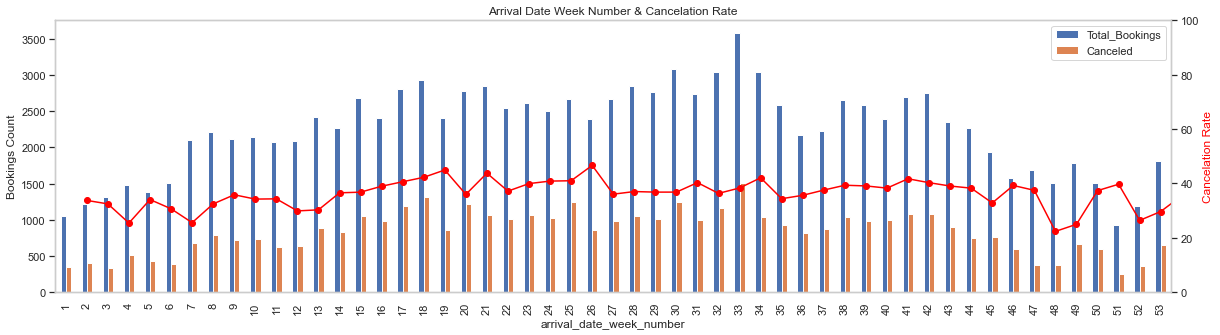

In [870]:
# determine total bookings, canceled bookings, and cancellation rate for arrival_date_week_number
arrival_date_week_number = hb.groupby('arrival_date_week_number').agg(Total_Bookings=('is_canceled','count'),Canceled=('is_canceled','sum'))
arrival_date_week_number['canceled rate']=(arrival_date_week_number['Canceled']/arrival_date_week_number['Total_Bookings']*100)

# plot combo chart of total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(20,5))
ax1=ax0.twinx()


ax= arrival_date_week_number.plot(kind='bar',y=['Total_Bookings','Canceled'],ax=ax0)
ax.set_title('Arrival Date Week Number & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

# for p in ax0.patches:
#     ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))
    
ax = arrival_date_week_number.plot(kind='line', y=['canceled rate'], secondary_y=True, marker='o',color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

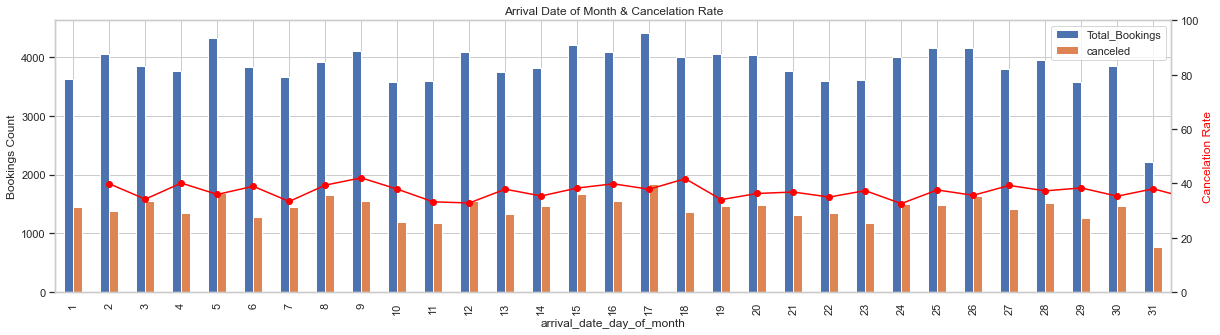

In [873]:
# determine total bookings, canceled bookings and cancelation rate for arrival_date_day_of_month
arrival_date_day_of_month= hb.groupby('arrival_date_day_of_month').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
arrival_date_day_of_month['canceled rate']=(arrival_date_day_of_month['canceled']/arrival_date_day_of_month['Total_Bookings'])*100

# plot total bookings, canceled bookings and cancellation rate 
fig0, ax0 = plt.subplots(figsize=(20,5))
ax1=ax0.twinx()


ax=arrival_date_day_of_month.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Arrival Date of Month & Cancelation Rate')
ax.set_ylabel('Bookings Count')

# for p in ax0.patches:
#     ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=arrival_date_day_of_month.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

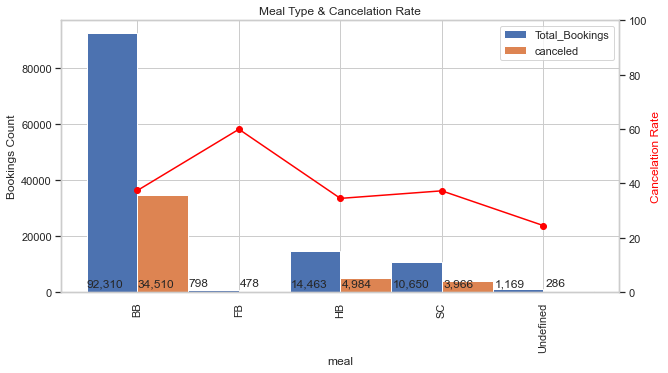

In [874]:
# determine total bookings, canceled bookings, and cancellation rate for meal
meal= hb.groupby('meal').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
meal['canceled rate']=(meal['canceled']/meal['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(10,5))
ax1=ax0.twinx()


ax=meal.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0,width=1)
ax.set_title('Meal Type & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=meal.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

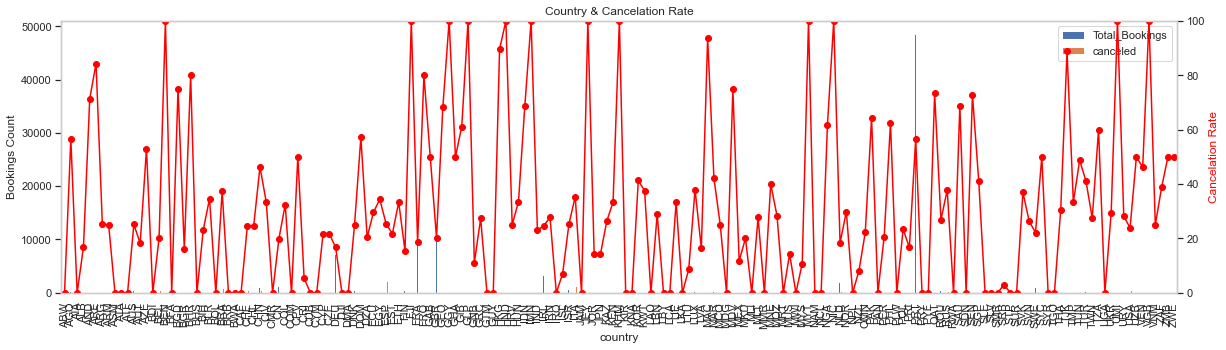

In [875]:
# determine total bookings, canceled bookings, and cancellation rate for country
country= hb.groupby('country').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
country['canceled rate']=(country['canceled']/country['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(20,5))
ax1=ax0.twinx()

ax=country.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Country & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

# for p in ax0.patches:
#     ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=country.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

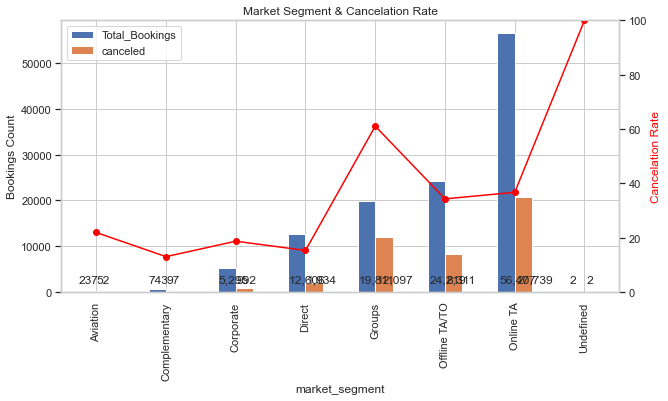

In [876]:
# determine total bookings, canceled bookings, and cancellation rate for market_segment
market_segment= hb.groupby('market_segment').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
market_segment['canceled rate']=(market_segment['canceled']/market_segment['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings and cancellation rate 
fig0, ax0 = plt.subplots(figsize=(10,5))
ax1=ax0.twinx()

ax=market_segment.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Market Segment & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=market_segment.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

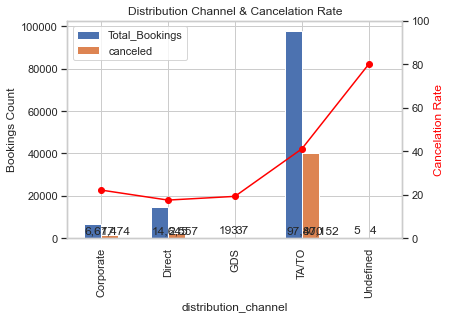

In [877]:
# determine total bookings, canceled bookings, and cancellation rate for distribution_channel
distribution_channel= hb.groupby('distribution_channel').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
distribution_channel['canceled rate']=(distribution_channel['canceled']/distribution_channel['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots()
ax1=ax0.twinx()

ax=distribution_channel.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Distribution Channel & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=distribution_channel.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

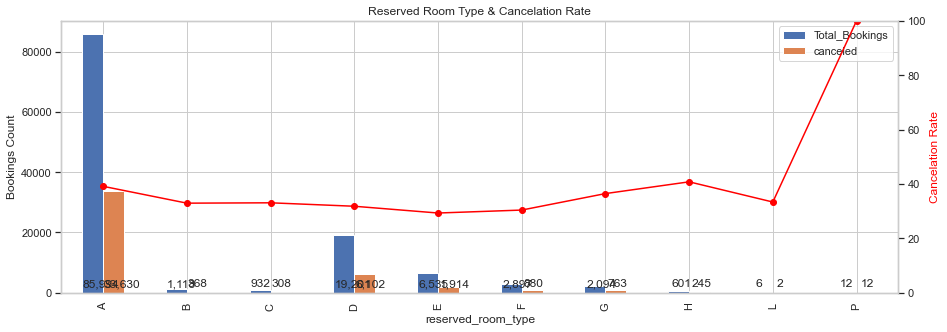

In [878]:
# determine total bookings, canceled bookings, and cancellation rate for reserved_room_type
reserved_room_type= hb.groupby('reserved_room_type').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
reserved_room_type['canceled rate']=(reserved_room_type['canceled']/reserved_room_type['Total_Bookings'])*100

# plot combo chart for total bookins, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(15,5))
ax1=ax0.twinx()

ax=reserved_room_type.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Reserved Room Type & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=reserved_room_type.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

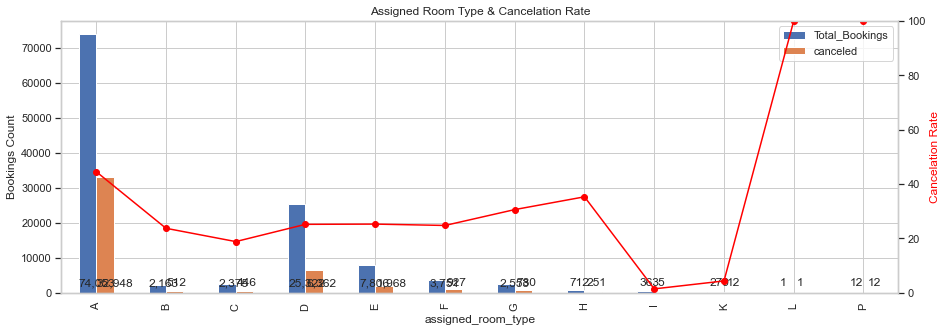

In [879]:
# determine total bookings, canceled bookings, and cancellation rate for assigned_room_type
assigned_room_type= hb.groupby('assigned_room_type').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
assigned_room_type['canceled rate']=(assigned_room_type['canceled']/assigned_room_type['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(15,5))
ax1=ax0.twinx()

ax=assigned_room_type.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Assigned Room Type & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=assigned_room_type.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

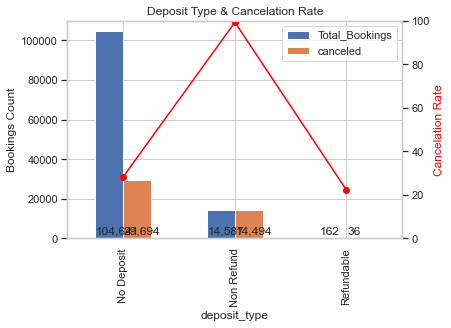

In [880]:
# determine total bookings, canceled bookings, and cancellation rate for deposit_type
deposit_type= hb.groupby('deposit_type').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
deposit_type['canceled rate']=(deposit_type['canceled']/deposit_type['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots()
ax1=ax0.twinx()

ax=deposit_type.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Deposit Type & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=deposit_type.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

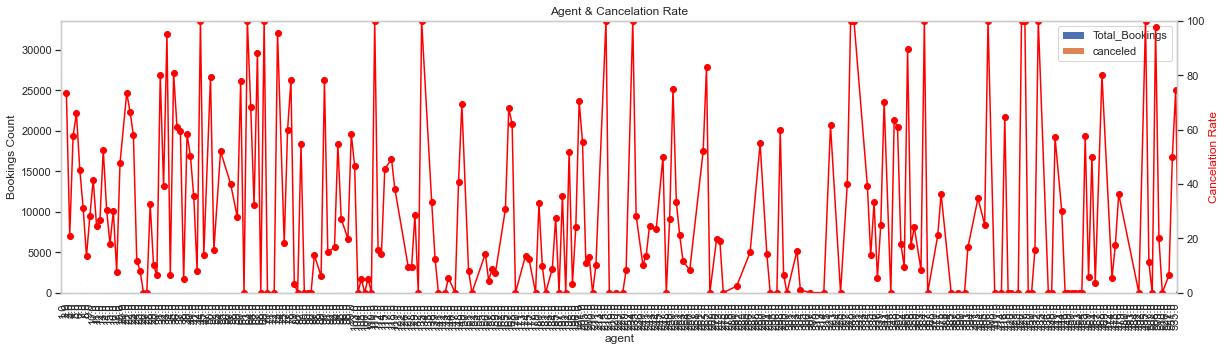

In [895]:
# determine total bookings,canceled bookings, and cancellation rate for agent
agent= hb.groupby('agent').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
agent['canceled rate']=(agent['canceled']/agent['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(20,5))
ax1=ax0.twinx()

ax=agent.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Agent & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

# for p in ax0.patches:
#     ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=agent.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

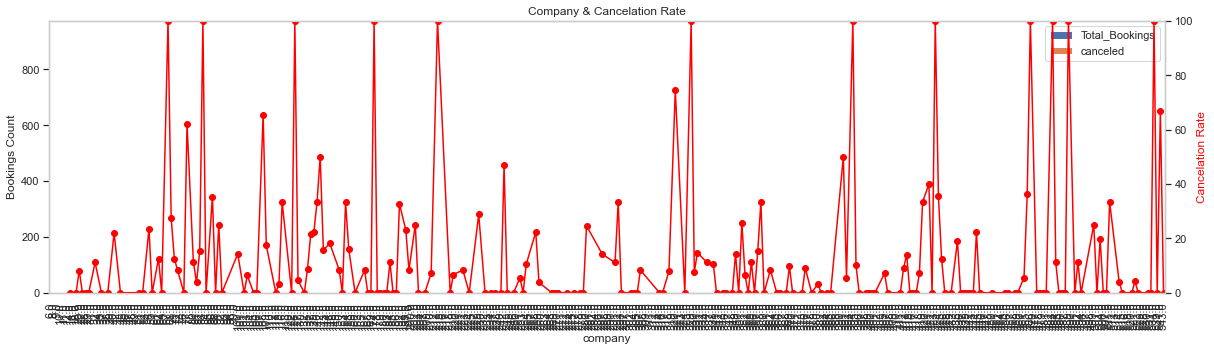

In [896]:
# determine total bookings, canceled bookings cand cancellation rate for company
company= hb.groupby('company').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
company['canceled rate']=(company['canceled']/company['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(20,5))
ax1=ax0.twinx()

ax=company.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Company & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

# for p in ax0.patches:
#     ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=company.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

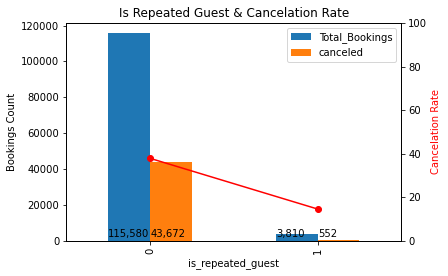

In [225]:
# determine total bookings, canceled bookings cand cancellation rate for company
is_repeated_guest = hb.groupby('is_repeated_guest').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
is_repeated_guest['canceled rate']=(is_repeated_guest['canceled']/is_repeated_guest['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots()
ax1=ax0.twinx()

ax=is_repeated_guest.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Is Repeated Guest & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=is_repeated_guest.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

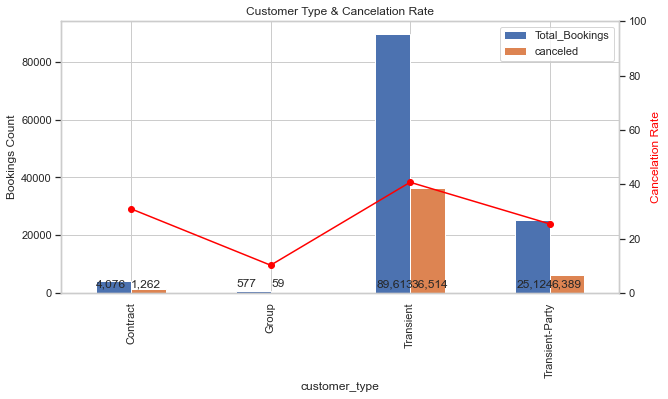

In [889]:
# determine total bookings, canceled bookings and cancellation rate for customer_type
customer_type= hb.groupby('customer_type').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
customer_type['canceled rate']=(customer_type['canceled']/customer_type['Total_Bookings'])*100

# plot total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(10,5))
ax1=ax0.twinx()

ax=customer_type.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Customer Type & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=customer_type.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

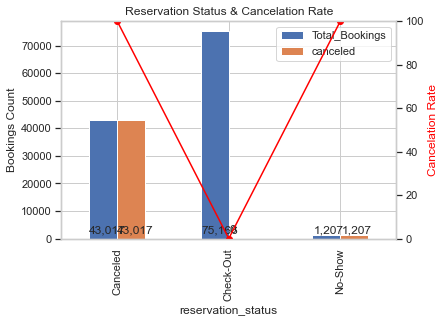

In [890]:
# determine total bookings, canceled bookings, and cancellation rate for reservation_status
reservation_status= hb.groupby('reservation_status').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
reservation_status['canceled rate']=(reservation_status['canceled']/reservation_status['Total_Bookings'])*100

# plot combo chart  for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots()
ax1=ax0.twinx()

ax=reservation_status.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Reservation Status & Cancelation Rate')
ax.set_ylabel('Bookings Count')

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=reservation_status.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

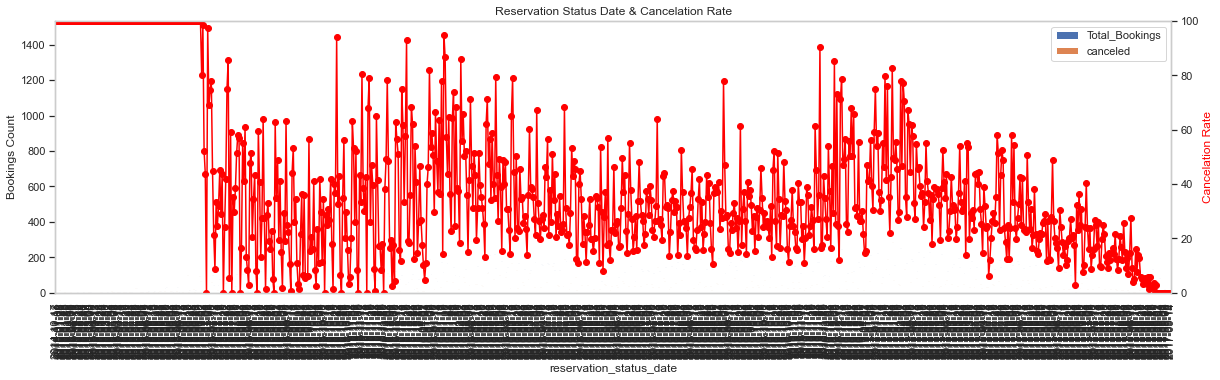

In [897]:
# determine total bookings, canceled bookings, and cancellation rate for reservation_status_date
reservation_status_date= hb.groupby('reservation_status_date').agg(Total_Bookings=('is_canceled','count'),canceled=('is_canceled','sum'))
reservation_status_date['canceled rate']=(reservation_status_date['canceled']/reservation_status_date['Total_Bookings'])*100

# plot combo chart for total bookings, canceled bookings, and cancellation rate
fig0, ax0 = plt.subplots(figsize=(20,5))
ax1=ax0.twinx()

ax=reservation_status_date.plot(kind='bar',y=['Total_Bookings','canceled'],ax=ax0)
ax.set_title('Reservation Status Date & Cancelation Rate')
ax.set_ylabel('Bookings Count')
ax.grid(False)

# for p in ax0.patches:
#     ax0.annotate("{:,}".format(p.get_height()),(p.get_x()*1.005,2000))

ax=reservation_status_date.plot(kind='line',y=['canceled rate'],secondary_y=True, marker='o', color='red', ax=ax1, legend=False)
plt.ylim(0,100)
ax.set_ylabel('Cancelation Rate',color='red')
ax.grid(False)

plt.show()
plt.close()

In [226]:
# define information value and weight of evidence task
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [227]:
# subset categorical variables into seperate dataframe
cat_var= hb[['is_canceled','hotel','arrival_date_year','arrival_date_month','is_repeated_guest','arrival_date_week_number','arrival_date_day_of_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status','reservation_status_date']]

# run information value and weight of evidence tests defined in last cell
iv, woe = iv_woe(cat_var, 'is_canceled', show_woe = True)
print(iv)
print(woe)

Information value of hotel is 0.083066
  Variable        Cutoff      N  Events  % of Events  Non-Events  \
0    hotel    City Hotel  79330   33102     0.748508       46228   
1    hotel  Resort Hotel  40060   11122     0.251492       28938   

   % of Non-Events       WoE        IV  
0         0.615012  0.196439  0.026224  
1         0.384988 -0.425799  0.056842  
Information value of arrival_date_year is 0.002925
            Variable  Cutoff      N  Events  % of Events  Non-Events  \
0  arrival_date_year    2015  21996    8142     0.184108       13854   
1  arrival_date_year    2016  56707   20337     0.459863       36370   
2  arrival_date_year    2017  40687   15745     0.356028       24942   

   % of Non-Events       WoE            IV  
0         0.184312 -0.001107  2.256490e-07  
1         0.483862 -0.050871  1.220851e-03  
2         0.331826  0.070401  1.703907e-03  
Information value of arrival_date_month is 0.021478
              Variable     Cutoff      N  Events  % of Events

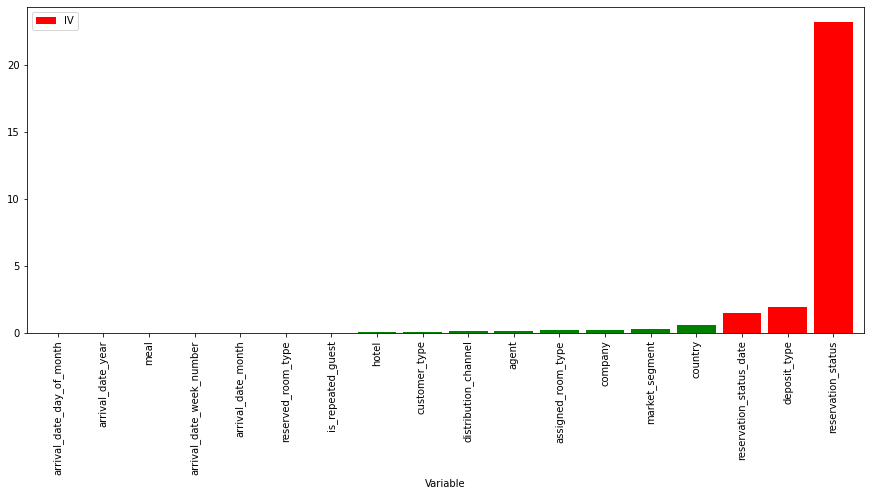

                    Variable         IV   good
0  arrival_date_day_of_month   0.002155  False
0          arrival_date_year   0.002925  False
0                       meal   0.010937  False
0   arrival_date_week_number   0.021410  False
0         arrival_date_month   0.021478  False
0         reserved_room_type   0.024181  False
0          is_repeated_guest   0.039400  False
0                      hotel   0.083066   True
0              customer_type   0.087284   True
0       distribution_channel   0.156327   True
0                      agent   0.163993   True
0         assigned_room_type   0.200107   True
0                    company   0.246920   True
0             market_segment   0.328541   True
0                    country   0.589854   True
0    reservation_status_date   1.486378  False
0               deposit_type   1.951050  False
0         reservation_status  23.185306  False


In [228]:
# sort outcome of information value tests & determine acceptable threshold
iv_sorted=iv.sort_values('IV')
iv_sorted['good'] = (iv_sorted['IV'] >= 0.04) & (iv_sorted['IV'] <= 0.6)

# plot and print information value
ax = iv_sorted.plot.bar(x='Variable', y='IV', rot=90, figsize=(15,6), width=0.85, color=iv_sorted.good.map({True: 'g', False: 'r'}))
plt.show()
print(iv_sorted)

In [145]:
# import necessary packages for logisticRegression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats



In [13]:
# subset a new dataframe to include significant continuous and categorical variables
hb2=hb[['lead_time','stays_in_week_nights','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','hotel','customer_type','distribution_channel','assigned_room_type','market_segment','country']]

# create list of significant categorical variables
cat_vars= ['hotel','customer_type','distribution_channel','assigned_room_type','market_segment','country']

# create dummy variables for significant categorical variables to prepare for logistic Regression
for i in cat_vars:
    cat_list='var' + '_'+ i
    cat_list=pd.get_dummies(hb2[i],prefix=i)
    hb3=hb2.join(cat_list)
    hb2=hb3

# include significant continuous variables to dummy variables
data_vars=hb2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

# create new dataframe with all significant continuous variables and dummy variables
data_final=hb2[to_keep]
data_final.columns.values

array(['lead_time', 'stays_in_week_nights', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'hotel_City Hotel',
       'hotel_Resort Hotel', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'assigned_room_type_A', 'assigned_room_type_B',
       'assigned_room_type_C', 'assigned_room_type_D',
       'assigned_room_type_E', 'assigned_room_type_F',
       'assigned_room_type_G', 'assigned_room_type_H',
       'assigned_room_type_I', 'assigned_room_type_K',
       'assigned_room_type_L', 'assigned_room_type_P',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_C

In [230]:
# select most impactful significant variables
data_final_2 = data_final[['lead_time', 'stays_in_week_nights', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'hotel_City Hotel',
       'hotel_Resort Hotel','customer_type_Contract',
       'customer_type_Transient','customer_type_Transient-Party',
       'distribution_channel_TA/TO','distribution_channel_Direct',
        'assigned_room_type_A','assigned_room_type_D',
        'market_segment_Online TA','market_segment_Groups',
        'market_segment_Offline TA/TO','country_PRT',
        'country_GBR','country_ESP']]

In [231]:
# prepare data for logistic Regression
x_train,x_test,y_train,y_test = train_test_split(data_final_2, hb.is_canceled, train_size=0.8)

In [232]:
# ensure data for model is correct
x_test

,lead_time,stays_in_week_nights,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,hotel_City Hotel,...,distribution_channel_TA/TO,distribution_channel_Direct,assigned_room_type_A,assigned_room_type_D,market_segment_Online TA,market_segment_Groups,market_segment_Offline TA/TO,country_PRT,country_GBR,country_ESP
79282,37,2,0,0,0,0,0,105.30,0,1,...,1,0,0,1,1,0,0,0,0,0
114719,396,0,0,0,0,2,0,95.50,0,1,...,1,0,1,0,0,0,1,1,0,0
38272,256,5,0,0,0,0,0,156.51,1,0,...,1,0,0,0,1,0,0,0,0,0
46232,13,0,0,0,0,0,0,116.00,0,1,...,0,1,0,1,0,0,0,1,0,0
55649,405,2,0,0,0,0,0,62.00,0,1,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,154,3,0,0,0,0,0,150.92,0,0,...,1,0,0,0,1,0,0,1,0,0
41533,46,1,0,0,0,0,0,62.00,0,1,...,1,0,1,0,0,1,0,0,0,1
71050,141,5,0,0,0,0,0,130.00,0,1,...,1,0,1,0,0,1,0,1,0,0
52809,69,4,0,0,0,0,0,120.00,0,1,...,1,0,1,0,0,0,1,1,0,0


In [233]:
# train model with training data
model = LogisticRegression(solver='lbfgs', max_iter=100)
model.fit(x_train,y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [234]:
# run model on prepared test data
y_predicted=model.predict(x_test)

In [235]:
# run model to establish predicted probability
y_prob= model.predict_proba(x_test)

# second element in 2d array is the probability of canceled bookings
y_prob

array([[0.86949429, 0.13050571],
       [0.59340789, 0.40659211],
       [0.93937757, 0.06062243],
       ...,
       [0.05294496, 0.94705504],
       [0.31488649, 0.68511351],
       [0.41203027, 0.58796973]])

In [236]:
# logistic regression model score-accuracy of model against training data
model.score(x_test,y_test)

0.7723846218276238

In [237]:
# array of predicted values
y_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [238]:
# determine coefficients of model results
model.coef_

array([[ 0.00578032,  0.08873378, -0.0709874 ,  1.46643538, -0.77414787,
        -0.47031064, -0.00214352,  0.00404714, -1.49574821, -0.61220138,
        -1.05729891, -0.37497182,  0.22042772, -1.43047013,  0.18388022,
        -1.30425258,  0.0872821 , -0.41294027,  0.17273928,  0.8357186 ,
        -0.72562508,  2.05467869, -0.55599151,  0.09654333]])

In [239]:
# y-intercept
model.intercept_

array([-1.67050403])

In [240]:
# import necessary package and define sigmoid function
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [241]:
# define equation for sigmoid function 
def prediction_function(lead_time):
    z=6.24443497e-03*lead_time - 1.58
    y=sigmoid(z)
    return y

In [242]:
# run prediction equation with random value
print('Prediction is more than 0.5 which means customer is more likely to cancel a booking with a lead time of 300 days:')
lead_time =300
prediction_function(lead_time)


Prediction is more than 0.5 which means customer is more likely to cancel a booking with a lead time of 300 days:


0.5728112960554115

In [243]:
# import packages for confusion matrix and determine matrix
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[13191,  1805],
       [ 3630,  5252]], dtype=int64)

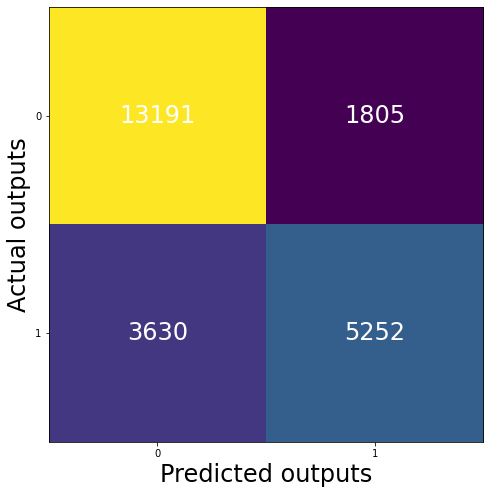

In [244]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=24, color='black')
ax.set_ylabel('Actual outputs', fontsize=24, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white',fontsize=24)
plt.show()

In [256]:
cr= classification_report(y_test, y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83     14996
           1       0.74      0.59      0.66      8882

    accuracy                           0.77     23878
   macro avg       0.76      0.74      0.74     23878
weighted avg       0.77      0.77      0.77     23878



In [245]:

y_test = np.array(y_test)
list_y_test= y_test.tolist()


y_predicted = np.array(y_predicted)
list_y_predicted=y_predicted.tolist()


y_prob2=np.delete(y_prob,0,axis=1)
y_prob3=np.array(y_prob2).flatten()
list_y_prob3= y_prob3.tolist()



preds= pd.DataFrame({'y_test3': list_y_test, 'y_predicted3': list_y_predicted,'y_prob3': list_y_prob3},columns=['y_test3','y_predicted3','y_prob3'])
preds.head()

,y_test3,y_predicted3,y_prob3
0,0,0,0.130506
1,0,0,0.406592
2,0,0,0.060622
3,1,0,0.235020
4,1,1,0.979542


In [246]:
import sklearn.metrics

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):

    df.sort_values(by=probability_col, ascending=False, inplace=True)

    subset = df[df[predicted_col] == True]

    rows = []
    for group in np.array_split(subset, 10):
        score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                                   group[predicted_col].tolist(),
                                                   normalize=False)

        rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

    lift = pd.DataFrame(rows)

    #Cumulative Gains Calculation
    lift['RunningCorrect'] = lift['NumCorrectPredictions'].cumsum()
    lift['PercentCorrect'] = lift.apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x['RunningCorrect'], axis=1)
    lift['CumulativeCorrectBestCase'] = lift['NumCases'].cumsum()
    lift['PercentCorrectBestCase'] = lift['CumulativeCorrectBestCase'].apply(
        lambda x: 100 if (100 / lift['NumCorrectPredictions'].sum()) * x > 100 else (100 / lift[
            'NumCorrectPredictions'].sum()) * x)
    lift['AvgCase'] = lift['NumCorrectPredictions'].sum() / len(lift)
    lift['CumulativeAvgCase'] = lift['AvgCase'].cumsum()
    lift['PercentAvgCase'] = lift['CumulativeAvgCase'].apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x)

    #Lift Chart
    lift['NormalisedPercentAvg'] = 1
    lift['NormalisedPercentWithModel'] = lift['PercentCorrect'] / lift['PercentAvgCase']

    return lift

gains = calc_cumulative_gains(preds,'y_test3','y_predicted3','y_prob3')
gains

,NumCases,NumCorrectPredictions,RunningCorrect,PercentCorrect,CumulativeCorrectBestCase,PercentCorrectBestCase,AvgCase,CumulativeAvgCase,PercentAvgCase,NormalisedPercentAvg,NormalisedPercentWithModel
0,706,700,700,13.328256,706,13.442498,525.2,525.2,10.0,1,1.332826
1,706,699,1399,26.637471,1412,26.884996,525.2,1050.4,20.0,1,1.331874
2,706,670,2069,39.394516,2118,40.327494,525.2,1575.6,30.0,1,1.313151
3,706,618,2687,51.161462,2824,53.769992,525.2,2100.8,40.0,1,1.279037
4,706,540,3227,61.443260,3530,67.212490,525.2,2626.0,50.0,1,1.228865
5,706,428,3655,69.592536,4236,80.654989,525.2,3151.2,60.0,1,1.159876
6,706,440,4095,77.970297,4942,94.097487,525.2,3676.4,70.0,1,1.113861
7,705,391,4486,85.415080,5647,100.000000,525.2,4201.6,80.0,1,1.067688
8,705,411,4897,93.240670,6352,100.000000,525.2,4726.8,90.0,1,1.036007
9,705,355,5252,100.000000,7057,100.000000,525.2,5252.0,100.0,1,1.000000


<ipython-input-247-15136548cf1e>:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, labels=[h[0].get_label() for h in handles],loc="center right")
<ipython-input-247-15136548cf1e>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


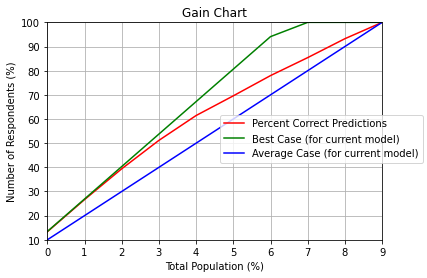

In [247]:
# plot gains chart
    
def plot_cumulative_gains(lift: pd.DataFrame):
        fig, ax = plt.subplots()
        fig.canvas.draw()
    
        handles = []
        handles.append(ax.plot(lift['PercentCorrect'], 'r-', label='Percent Correct Predictions'))
        handles.append(ax.plot(lift['PercentCorrectBestCase'], 'g-', label='Best Case (for current model)'))
        handles.append(ax.plot(lift['PercentAvgCase'], 'b-', label='Average Case (for current model)'))
        ax.set_xlabel('Total Population (%)')
        ax.set_ylabel('Number of Respondents (%)')
    
        ax.set_xlim([0, 9])
        ax.set_ylim([10, 100])
    
        ax.set_title('Gain Chart')
        ax.grid(True)
        
        fig.legend(handles, labels=[h[0].get_label() for h in handles],loc="center right")
        fig.show()

plot_cumulative_gains(gains)        

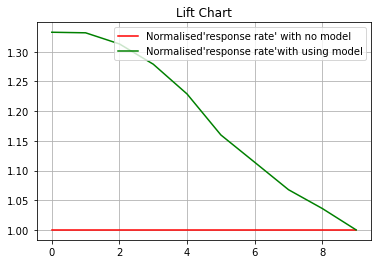

In [248]:
# visual lift chart
def plot_lift_chart(lift: pd.DataFrame):
    plt.figure()
    plt.plot(lift['NormalisedPercentAvg'], 'r-',label= 'Normalised\'response rate\' with no model')
    plt.plot(lift['NormalisedPercentWithModel'],'g-',label= 'Normalised\'response rate\'with using model')
    plt.legend()
    plt.grid(True)
    plt.title('Lift Chart')
    plt.show()
plot_lift_chart(gains)    

In [252]:
is_repeated_guest

,Total_Bookings,canceled,canceled rate
is_repeated_guest,,,
0,115580,43672,37.785084
1,3810,552,14.488189
